<a href="https://colab.research.google.com/github/GabrielG1997/COLAB/blob/main/RecommendationSystemBasedOnImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
 This project was created as an exercise in BairesDev bootcamp provided by DIO platform to fixate on the knowledge learned during the module about COLAB.

The idea is to create a Recommendation System where the model analize the image provided by the user and redirect the user to the google shooping URL to shop similar items to the item identified.

The model used was ResNet50 pre-trained with imagenet dataSet, no additional training was done.

In [26]:
#Imports
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from urllib.parse import quote_plus

import numpy as np
import sys
import subprocess
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Defining pre-trained model with imagenet weights
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# Downloading images to use as examples
if "google.colab" in sys.modules:

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "wget https://cdn.create.vista.com/api/media/small/520840774/stock-photo-laptop-blank-screen-wood-table-blurred-coffee-shop-cafe-interior -O laptop.png",
        shell=True,
    )

In [12]:
#defining default size
figsize=(10,10)

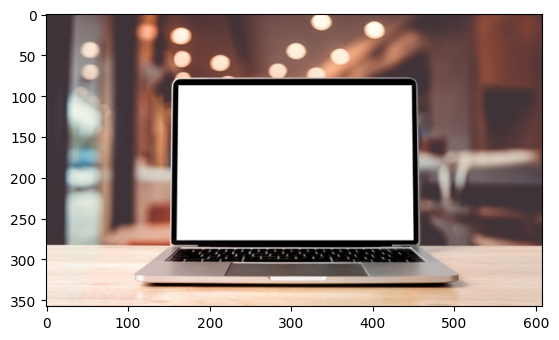

In [15]:
img = mpimg.imread('laptop.jpg')
imgplot = plt.imshow(img)
plt.show()

In [28]:
img_path = 'laptop.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
decoded_preds = decode_predictions(preds, top=1)
print('Predicted:', decoded_preds[0])
# Predicted: [(class_name, class_description, score), (class_name, class_description, score), (class_name, class_description, score)]

# Get class description
class_description = decoded_preds[0][0][1]

# Create search link (Google)
search_url = f"https://www.google.com/search?tbm=shop&q={quote_plus(class_description)}"

# Show as link
print(f"To buy similar products access: {search_url}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Predicted: [('n03832673', 'notebook', 0.91261077)]
To buy similar products access: https://www.google.com/search?tbm=shop&q=notebook
